In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import platform

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


In [3]:
from psutil import virtual_memory

ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))
if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


# Monthly

In [4]:
if platform.system() == 'Windows':
  pm10_monthly = pd.read_csv("..\\Data for model\\co_meteorolgical_monthly.csv")
elif platform.system() == 'Linux':
  from google.colab import drive
  drive.mount('/content/gdrive')
  pm10_monthly = pd.read_csv("/content/gdrive/Othercomputers/My Laptop (1)/jkt-aqi-forecasting/Model/Data for Model/co_meteorolgical_monthly.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## CO

In [5]:
co_monthly

,tanggal,co(ug/m3),co_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
0,2010-01-31,2372.3,30,27.4,80.2,14.4,2.5
1,2010-02-28,2825.5,36,28.2,80.3,9.6,2.6
2,2010-03-31,2897.4,36,28.6,78.5,9.4,2.6
3,2010-04-30,2720.0,34,29.6,74.5,2.2,2.7
4,2010-05-31,2907.7,37,29.3,76.7,2.8,2.7
...,...,...,...,...,...,...,...
115,2019-08-31,1680.0,22,28.3,68.8,0.0,1.4
116,2019-09-30,1523.2,20,28.8,68.9,0.0,1.2
117,2019-10-31,1540.0,20,29.5,70.0,0.0,1.2
118,2019-11-30,1363.2,18,29.5,70.8,2.0,1.3


In [6]:
co_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tanggal                         120 non-null    object 
 1   co(ug/m3)                       120 non-null    float64
 2   co_ispu                         120 non-null    int64  
 3   temperatur_rata-rata(°C)        120 non-null    float64
 4   kelembapan_rata-rata(%)         120 non-null    float64
 5   curah_hujan(mm)                 120 non-null    float64
 6   kecepatan_angin_rata-rata(m/s)  120 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 6.7+ KB


In [7]:
co_monthly['tanggal'] = pd.to_datetime(co_monthly['tanggal'], dayfirst=True)
co_monthly.set_index('tanggal', inplace=True)

In [8]:
co_monthly.describe()

,co(ug/m3),co_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,2140.963333,27.225000,28.484167,75.831667,5.907500,1.881667
std,458.311636,5.590301,0.658365,4.315148,5.617263,0.680457
min,1150.500000,15.000000,26.600000,66.300000,0.000000,0.900000
25%,1772.150000,23.000000,28.175000,72.750000,1.800000,1.300000
50%,2168.800000,27.500000,28.600000,76.300000,5.050000,1.600000
75%,2529.600000,32.000000,28.900000,78.600000,8.525000,2.600000
max,3062.400000,39.000000,29.900000,84.800000,33.000000,3.300000


In [9]:
co_monthly.corr(method='spearman')

,co(ug/m3),co_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
co(ug/m3),1.000000,0.998476,-0.105411,0.360797,0.340931,0.460545
co_ispu,0.998476,1.000000,-0.107821,0.362407,0.341291,0.457511
temperatur_rata-rata(°C),-0.105411,-0.107821,1.000000,-0.674751,-0.598617,-0.110798
kelembapan_rata-rata(%),0.360797,0.362407,-0.674751,1.000000,0.845926,0.006361
curah_hujan(mm),0.340931,0.341291,-0.598617,0.845926,1.000000,0.087252
kecepatan_angin_rata-rata(m/s),0.460545,0.457511,-0.110798,0.006361,0.087252,1.000000


### Visualize

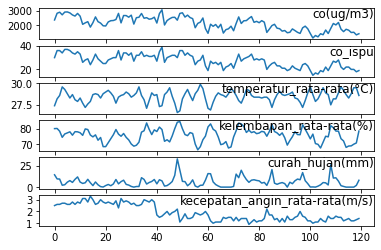

In [10]:
groups = [0, 1, 2, 3, 4, 5]
i = 1
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(co_monthly.values[:, group])
    plt.title(co_monthly.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

### Sliding Window

In [11]:
def series_to_supervised(index, data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    agg.index = index
    if dropnan:
        agg.dropna(inplace=True)
    return agg

values = co_monthly.values
reframed = series_to_supervised(co_monthly.index, values, 3, 1)
reframed = reframed.iloc[:, :-5]
reframed

,var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var6(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t)
tanggal,,,,,,,,,,,,,,,,,,,
2010-04-30,2372.3,30.0,27.4,80.2,14.4,2.5,2825.5,36.0,28.2,80.3,9.6,2.6,2897.4,36.0,28.6,78.5,9.4,2.6,2720.0
2010-05-31,2825.5,36.0,28.2,80.3,9.6,2.6,2897.4,36.0,28.6,78.5,9.4,2.6,2720.0,34.0,29.6,74.5,2.2,2.7,2907.7
2010-06-30,2897.4,36.0,28.6,78.5,9.4,2.6,2720.0,34.0,29.6,74.5,2.2,2.7,2907.7,37.0,29.3,76.7,2.8,2.7,2916.0
2010-07-31,2720.0,34.0,29.6,74.5,2.2,2.7,2907.7,37.0,29.3,76.7,2.8,2.7,2916.0,37.0,28.8,77.4,5.8,2.6,2849.7
2010-08-31,2907.7,37.0,29.3,76.7,2.8,2.7,2916.0,37.0,28.8,77.4,5.8,2.6,2849.7,36.0,28.3,78.1,7.6,2.6,2713.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,1751.4,22.0,29.6,73.6,1.7,1.5,1582.9,20.0,29.2,72.1,0.8,1.2,1741.5,22.0,28.7,67.9,0.0,1.3,1680.0
2019-09-30,1582.9,20.0,29.2,72.1,0.8,1.2,1741.5,22.0,28.7,67.9,0.0,1.3,1680.0,22.0,28.3,68.8,0.0,1.4,1523.2
2019-10-31,1741.5,22.0,28.7,67.9,0.0,1.3,1680.0,22.0,28.3,68.8,0.0,1.4,1523.2,20.0,28.8,68.9,0.0,1.2,1540.0


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
reframed = pd.DataFrame(scaler.fit_transform(reframed), index=reframed.index, columns=reframed.columns)
reframed

,var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var6(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t)
tanggal,,,,,,,,,,,,,,,,,,,
2010-04-30,0.639050,0.625000,0.242424,0.751351,0.436364,0.666667,0.876092,0.875000,0.484848,0.756757,0.290909,0.708333,0.913698,0.875000,0.606061,0.659459,0.284848,0.708333,0.820911
2010-05-31,0.876092,0.875000,0.484848,0.756757,0.290909,0.708333,0.913698,0.875000,0.606061,0.659459,0.284848,0.708333,0.820911,0.791667,0.909091,0.443243,0.066667,0.750000,0.919086
2010-06-30,0.913698,0.875000,0.606061,0.659459,0.284848,0.708333,0.820911,0.791667,0.909091,0.443243,0.066667,0.750000,0.919086,0.916667,0.818182,0.562162,0.084848,0.750000,0.923427
2010-07-31,0.820911,0.791667,0.909091,0.443243,0.066667,0.750000,0.919086,0.916667,0.818182,0.562162,0.084848,0.750000,0.923427,0.916667,0.666667,0.600000,0.175758,0.708333,0.888749
2010-08-31,0.919086,0.916667,0.818182,0.562162,0.084848,0.750000,0.923427,0.916667,0.666667,0.600000,0.175758,0.708333,0.888749,0.875000,0.515152,0.637838,0.230303,0.708333,0.817407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,0.314295,0.291667,0.909091,0.394595,0.051515,0.250000,0.226162,0.208333,0.787879,0.313514,0.024242,0.125000,0.309117,0.291667,0.636364,0.086486,0.000000,0.166667,0.276950
2019-09-30,0.226162,0.208333,0.787879,0.313514,0.024242,0.125000,0.309117,0.291667,0.636364,0.086486,0.000000,0.166667,0.276950,0.291667,0.515152,0.135135,0.000000,0.208333,0.194937
2019-10-31,0.309117,0.291667,0.636364,0.086486,0.000000,0.166667,0.276950,0.291667,0.515152,0.135135,0.000000,0.208333,0.194937,0.208333,0.666667,0.140541,0.000000,0.125000,0.203724


In [13]:
from datetime import datetime

train_end = datetime.strptime('2018-12-31', '%Y-%m-%d')
test_start = datetime.strptime('2019-01-01', '%Y-%m-%d')
test_end = datetime.strptime('2019-12-31', '%Y-%m-%d')

train = reframed.loc[:train_end].values
test = reframed.loc[test_start:test_end].values
train_X, train_y = train[:, :-1], train[:, -1:]
test_X, test_y = test[:, :-1], test[:, -1:]
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(105, 18) (105, 1) (12, 18) (12, 1)


In [14]:
!pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
from sklearn.svm import SVR
import keras_tuner as kt

def call_existing_code(kernel, degree, gamma, coef0, tol, C, epsilon, shrinking):
    model = SVR(
        kernel=kernel,
        degree=degree, # poly
        gamma=gamma, # rbf, poly
        coef0=coef0, # poly
        tol=tol,
        C=C,
        epsilon=epsilon,
        shrinking=shrinking
    )
    return model

def build_model(hp):
    kernel = hp.Choice("kernel", ["poly", "rbf", "linear"], default="rbf")
    degree = hp.Int("degree", min_value=1, max_value=10, step=1, default=3)
    gamma = hp.Choice("gamma", ["scale", "auto"], default="scale")
    # gamma = hp.Choice("gamma", [1.0, 0.1, 0.01, 0.001, 0.0001])
    coef0 = hp.Float("coef0", min_value=0.0, max_value=1.0, step=0.1, default=0.0)
    tol = hp.Float("tol", min_value=1e-4, max_value=1e-2, default=1e-3)
    C = hp.Choice("C", [0.1, 1.0, 10.0, 100.0, 1000.0], default=1.0)
    epsilon = hp.Float("epsilon", min_value=1e-3, max_value=1.0, default=1e-1)
    shrinking = hp.Boolean("shrinking", default=True)
    model = call_existing_code(
        kernel=kernel,
        degree=degree,
        gamma=gamma,
        coef0=coef0,
        tol=tol,
        C=C,
        epsilon=epsilon,
        shrinking=shrinking
    )
    return model

build_model(kt.HyperParameters())

SVR()

In [16]:
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

if platform.system() == 'Windows':
  tuner = kt.tuners.SklearnTuner(
      oracle=kt.oracles.BayesianOptimizationOracle(
          objective=kt.Objective('score', 'max'),
          max_trials=100
      ),
    hypermodel=build_model,
    scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False),
    cv=TimeSeriesSplit(),
    overwrite=False,
    directory="D:\\From External Drive\\Kuliah\\Tugas Akhir\\undergraduate-thesis_2.0\\data-and-model\\Model",
    project_name="svr_co_monthly_80-20_result"
  )
elif platform.system() == 'Linux':
  tuner = kt.tuners.SklearnTuner(
      oracle=kt.oracles.BayesianOptimizationOracle(
          objective=kt.Objective('score', 'max'),
          max_trials=100
      ),
    hypermodel=build_model,
    scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False),
    cv=TimeSeriesSplit(),
    overwrite=False,
    directory="/content/drive/Othercomputers/My Laptop (1)/undergraduate-thesis_2.0/data-and-model/Model",
    project_name="svr_co_monthly_80-20_result"
    )

tuner.search(train_X, train_y)

In [17]:
tuner.results_summary()

Results summary
Results in /content/drive/Othercomputers/My Laptop (1)/undergraduate-thesis_2.0/data-and-model/Model/svr_co_monthly_80-20_result
Showing 10 best trials
Trial summary
Hyperparameters:
kernel: rbf
degree: 4
gamma: auto
coef0: 0.6000000000000001
tol: 0.00499607317316696
C: 10.0
epsilon: 0.18618519086887833
shrinking: False
Score: -0.15188429152857438
Trial summary
Hyperparameters:
kernel: rbf
degree: 4
gamma: auto
coef0: 0.6000000000000001
tol: 0.005024046371504956
C: 10.0
epsilon: 0.18512331575891633
shrinking: False
Score: -0.15228301369812802
Trial summary
Hyperparameters:
kernel: rbf
degree: 4
gamma: auto
coef0: 0.6000000000000001
tol: 0.005028950072297643
C: 10.0
epsilon: 0.1818922219644221
shrinking: False
Score: -0.15252451092004637
Trial summary
Hyperparameters:
kernel: rbf
degree: 4
gamma: auto
coef0: 0.6000000000000001
tol: 0.0050297338083144585
C: 10.0
epsilon: 0.18364793514760416
shrinking: False
Score: -0.15253859672569312
Trial summary
Hyperparameters:
kernel

In [18]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model

SVR(C=10.0, coef0=0.6000000000000001, degree=4, epsilon=0.18618519086887833,
    gamma='auto', shrinking=False, tol=0.00499607317316696)

In [19]:
import numpy as np

best_hps = tuner.get_best_hyperparameters(10)
model = build_model(best_hps[0])
model.fit(train_X, train_y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10.0, coef0=0.6000000000000001, degree=4, epsilon=0.18618519086887833,
    gamma='auto', shrinking=False, tol=0.00499607317316696)

In [20]:
train_y = train_y.reshape((len(train_y), 1))
inv_y = np.concatenate((train_y, train_X), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

pred = model.predict(train_X)
pred = pred.reshape((len(pred), 1))
inv_yhat = np.concatenate((pred, train_X), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

train_result = pd.DataFrame({'actual': inv_y, 'pred': inv_yhat}, index=reframed.loc[:train_end].index)

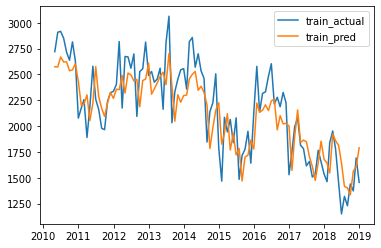

In [21]:
plt.plot(train_result['actual'], label='train_actual')
plt.plot(train_result['pred'], label='train_pred')
plt.legend()
plt.show()

In [22]:
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [23]:
from sklearn.metrics import r2_score

rmse = mean_squared_error(inv_y, inv_yhat, squared=False)
print(f'Train R-Squared: {r2_score(inv_y, inv_yhat) * 100:.3f}%')
print(f'Train RMSE: {rmse:.3f}')
print(f'Train MAPE: {mape(inv_y, inv_yhat):.3f}%')

Train R-Squared: 69.505%
Train RMSE: 246.946
Train MAPE: 10.129%


In [24]:
rmse_each_month = []
for index, value in train_result.iterrows():
    rmse_each_month.append(round(mean_squared_error([value['actual']], [value['pred']], squared=False), 2))
train_result['rmse'] = rmse_each_month

In [25]:
mape_each_month = []
for index, value in train_result.iterrows():
    mape_each_month.append(f"{round(mape([value['actual']], [value['pred']]), 2)}%")
train_result['mape'] = mape_each_month

In [26]:
train_result

,actual,pred,rmse,mape
tanggal,,,,
2010-04-30,2720.0,2574.249436,145.75,5.36%
2010-05-31,2907.7,2572.420539,335.28,11.53%
2010-06-30,2916.0,2668.611876,247.39,8.48%
2010-07-31,2849.7,2620.075685,229.62,8.06%
2010-08-31,2713.3,2620.718231,92.58,3.41%
...,...,...,...,...
2018-08-31,1229.3,1402.897246,173.60,14.12%
2018-09-30,1440.0,1336.458344,103.54,7.19%
2018-10-31,1373.3,1563.409802,190.11,13.84%


In [27]:
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

pred = model.predict(test_X)
pred = pred.reshape((len(pred), 1))
inv_yhat = np.concatenate((pred, test_X), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

test_result = pd.DataFrame({'actual': inv_y, 'pred': inv_yhat}, index=reframed.loc[test_start:test_end].index)

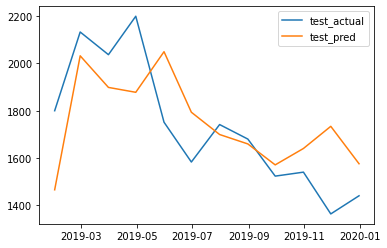

In [28]:
plt.plot(test_result['actual'], label='test_actual')
plt.plot(test_result['pred'], label='test_pred')
plt.legend()
plt.show()

In [29]:
rmse_each_month = []
for index, value in test_result.iterrows():
    rmse_each_month.append(round(mean_squared_error([value['actual']], [value['pred']], squared=False), 2))
test_result['rmse'] = rmse_each_month

In [30]:
mape_each_month = []
for index, value in test_result.iterrows():
    mape_each_month.append(f"{round(mape([value['actual']], [value['pred']]), 2)}%")
test_result['mape'] = mape_each_month

In [31]:
rmse = mean_squared_error(inv_y, inv_yhat, squared=False)
print(f'Test R-Squared: {r2_score(inv_y, inv_yhat) * 100:.3f}%')
print(f'Test RMSE: {rmse:.3f}')
print(f'Test MAPE: {mape(inv_y, inv_yhat):.3f}%')

Test R-Squared: 31.810%
Test RMSE: 213.882
Test MAPE: 10.417%


In [32]:
test_result

,actual,pred,rmse,mape
tanggal,,,,
2019-01-31,1800.0,1465.289353,334.71,18.6%
2019-02-28,2133.3,2032.486104,100.81,4.73%
2019-03-31,2037.3,1898.709854,138.59,6.8%
2019-04-30,2200.0,1878.045303,321.95,14.63%
2019-05-31,1751.4,2049.935334,298.54,17.05%
2019-06-30,1582.9,1793.610276,210.71,13.31%
2019-07-31,1741.5,1699.332391,42.17,2.42%
2019-08-31,1680.0,1659.457734,20.54,1.22%
2019-09-30,1523.2,1570.811005,47.61,3.13%
